In [61]:
#pip install plotly==5.1.0 
#pip install cufflinks
#pip install talib
#pip install TA-Lib
#pip install mlxtend
#pip install yfinance

SyntaxError: invalid syntax (Temp/ipykernel_2244/1324059114.py, line 5)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import csv
import talib as ta
from pylab import plt,mpl
import cufflinks as cf
import plotly.offline as plyo
from sklearn.pipeline import Pipeline
import yfinance as yf
plyo.init_notebook_mode(connected=True)
#import datetime as dt
#import sqlite3 as sq3


In [3]:
#Data is sourced from Yahoo Finance using yfinance API: https://pypi.org/project/yfinance/
#This API is free and there is no limitation on number of requests or number of scripts for which data can be pulled daily
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well== SPY MSFT
        tickers = "AAPL",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600
...,...,...,...,...,...
2021-11-15,150.369995,151.880005,149.429993,150.000000,59222800
2021-11-16,149.940002,151.490005,149.339996,151.000000,59256200
2021-11-17,151.000000,155.000000,150.990005,153.490005,88807000


In [2]:
names = ['Ticker', 'First','High','Low','Close','Value','Volume','OpenInt','Per','Open','Last'] #changing the columns names to fit the functions properly
raw = pd.read_csv('IranKhodro.csv',index_col=1, parse_dates=True , header = 0 , names = names)
#raw.set_index('Date')#naming the index
raw = raw.iloc[::-1]#reversing the dataframe to work better with indicators and oscillators,index[0] belongs to the farest date
raw.info()
# the commented code is needed when the program is complete and we are using stream of data and don't want to calculate previous calculation again
'''
if OCLHdf.index[len(OCLHdf)-1] > raw.index[len(raw)-1]: 
    pass
else:
    pass #The main code for streaming shoud be here
'''

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4235 entries, 2001-03-25 to 2021-08-01
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ticker   4235 non-null   object 
 1   First    4235 non-null   float64
 2   High     4235 non-null   float64
 3   Low      4235 non-null   float64
 4   Close    4235 non-null   float64
 5   Value    4235 non-null   int64  
 6   Volume   4235 non-null   int64  
 7   OpenInt  4235 non-null   int64  
 8   Per      4235 non-null   object 
 9   Open     4235 non-null   float64
 10  Last     4235 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 363.9+ KB


'\nif OCLHdf.index[len(OCLHdf)-1] > raw.index[len(raw)-1]: \n    pass\nelse:\n    pass #The main code for streaming shoud be here\n'

In [3]:
OCLHdf = raw[['Open','Close','Low','High']]#making the most useful DF for manipulating
OCLHVdf = OCLHdf
MeanRowSerie = OCLHdf.mean(axis=1)
MeanDataFrame = pd.Series.to_frame(MeanRowSerie , name="MeanPrice")#making the MeanDF to draw diagrams and providing a better understanding of data
MeanDataFrame
OCLHVdf['Volume']= raw['Volume']
OCLHVdf
dff = OCLHdf.copy()

In [ ]:
#Interactive Plotting with plotly
plyo.iplot(
MeanDataFrame.iloc[:,0].iplot(asFigure=True,
theme='polar',
title='An Asset Price Plot',
xTitle='date',
yTitle='Price',
mode={'MeanPrice': 'lines+markers'}, #'1': 'lines','2': 'lines','3': 'lines','4': 'lines','5': 'lines','6': 'lines','7': 'lines','8': 'lines','9': 'lines','10': 'lines','11': 'lines','12': 'lines','13': 'lines','14': 'lines','15': 'lines','16': 'lines','17': 'lines','18': 'lines'},
symbol={'MeanPrice': 'circle'},#, 'b': 'diamond'},
size=3.5))
#colors={'MeanPrice': 'blue'},),# '1': 'magenta'},),
#image='png',filename='ply_02')


In [ ]:
#CandleDataFrame = CandleDataFrame.iloc[-60:]
qf = cf.QuantFig(OCLHdf,title='ایران-خودرو',legend='top',name='خودرو')
plyo.iplot(qf.iplot(asFigure=True),image='png',filename='qf_01')

# ZIGZAG

In [4]:
#zigzag Function to produce the highs and lows,our first level of tags from DataFrames
def get_zigzag(df: pd.DataFrame, period: int):#self, 

     # translated from https://www.tradingview.com/script/mRbjBGdL-Double-Zig-Zag-with-HHLL/

    zigzag_pattern = []
    direction = 0
    changed = False
    for idx in range(1, len(df)):
        highest_high = ta.MAX(df['High'][:idx], timeperiod=period)[-1]
        lowest_low = ta.MIN(df['Low'][:idx], timeperiod=period)[-1]


        new_high = df['High'][idx] >= highest_high
        new_low = df['Low'][idx] <= lowest_low

        if new_high and not new_low:
            if direction != 1:
                direction = 1
                changed = True
            elif direction == 1:
                changed = False
        elif not new_high and new_low:
            if direction != -1:
                direction = -1
                changed = True
            elif direction == -1:
                changed = False

        if new_high or new_low:
            if changed or len(zigzag_pattern)==0:
                if direction == 1:
                    pat = [1, df['High'][idx], idx]
                    zigzag_pattern.append(pat)
                elif direction == -1:
                    pat = [-1, df['Low'][idx], idx]
                    zigzag_pattern.append(pat)
            else:
                if direction == 1 and df['High'][idx] > zigzag_pattern[-1][1]:
                    pat = [1, df['High'][idx], idx]
                    zigzag_pattern[-1] = pat
                elif direction == -1 and df['Low'][idx] < zigzag_pattern[-1][1]:
                    pat = [-1, df['Low'][idx], idx]
                    zigzag_pattern[-1] = pat
                else:
                    pass
                    #Mean = (df['Low'][idx]+df['High'][idx])/2
                    #pat = ['N', Mean, idx]
                    #zigzag_pattern[-1] = pat

    return zigzag_pattern # returning the LIST of Highs and Lows,corresponding Prices and the places of happening


In [ ]:
zigzag = get_zigzag(OCLHdf,period=5) #calling the Zigzag function with the period 5
#dff = OCLHdf.copy()
temp = []#adding tags from Zigzag in to the DF
for i in range(len(zigzag)):
    temp.append(zigzag[i][2]) 
tem=[]
for j in range(len(OCLHdf)):
    if j in temp:
        tem.insert(j,zigzag[temp.index(j)][0])
    else:
        tem.insert(j,0)
dff['Zigzag']=tem
dff

# RSI

In [ ]:
real = ta.RSI(OCLHdf['Close'], timeperiod=14)#returning a Serie of correspondig RSI indexes
temp = []
for i in range(len(real)):#adding Tags from RSI in to the DF
    if real[i]<30:
        temp.append('L')
    elif real[i]>70:
        temp.append('H')
    else:
        temp.append('N')
dff['Rsi']=temp
#dff=dff.drop('Rsi',axis=1)
dff

In [ ]:
#usful code to find the data between 20-80 in RSI
'''
y= real<20
x = real>80
z = (x) ^ (y)
z = real[z]
zigzag[0][2]
'''

In [ ]:
rsiDf = pd.Series.to_frame(real , name="indexes")# converting RSI Series to the DF to plot it
#Interactive Plotting with plotly that works only with DF
# plotting the RSI separately
plyo.iplot(
rsiDf.iplot(asFigure=True,
theme='polar',
title='An Asset RSI',
xTitle='date',
yTitle='RSI Index',
mode={'indexes': 'lines+markers'},#, 'b': 'lines+markers'},
symbol={'indexes': 'circle'},#, 'b': 'diamond'},
size=3.5,
colors={'indexes': 'blue'},),#, 'b': 'magenta'},),
image='png',filename='ply_02')

# MACD

In [ ]:
macd, macdsignal, macdhist = ta.MACDFIX(OCLHdf['Close'], signalperiod=9)#returning a Serie of correspondig MACD indexes
temp= []
macd = np.round(macd)
macdsignal = np.round(macdsignal)
for i in range(len(macd)):
    if macd[i] == macdsignal[i]:
        if macd[i+1] < macd[i] and macdsignal[i] > macd[i+1]:   #macd crosses macdsignal downward
            temp.append('H')
        elif macd[i+1] > macd[i] and macdsignal[i] < macd[i+1]: #macd can't cross macdsignal downward
            temp.append('L')
        elif macd[i+1] > macd[i] and macdsignal[i] < macd[i+1]: #macd crosses macdsignal upward
            temp.append('L')
        elif macd[i+1] < macd[i] and macdsignal[i] > macd[i+1]:   #macd can't cross macdsignal upward
            temp.append('H')
        else:
            temp.append('N') # macd and macdsignal go tanget
    else:
        temp.append('N') #no crossing happens
dff['MACD']=temp
dff

# CANDLES

In [5]:
def get_candles(df: pd.DataFrame):
    
    open = df['Open']
    high = df['High']
    low = df['Low']
    close = df['Close']
    
    def ignore_zero_series(df, serie, name= ""):#reducing the process by ignoring the full-zero series
        if serie.any():
            df[name] = serie
        else:
            pass
        return df
    
    integer = ta.CDL2CROWS(open, high, low, close)
    ignore_zero_series(df,integer,'2Crows')
    #df['2Crows'] = integer
    integer = ta.CDL3BLACKCROWS(open, high, low, close)
    ignore_zero_series(df,integer,'3BlackCrows')
    #df['3BlackCrows'] = integer
    integer = ta.CDL3INSIDE(open, high, low, close)
    ignore_zero_series(df,integer,'Inside')
    #df['Inside'] = integer
    integer = ta.CDL3OUTSIDE(open, high, low, close)
    ignore_zero_series(df,integer,'Outside')
    #df['Outside'] = integer
    integer = ta.CDL3STARSINSOUTH(open, high, low, close)
    ignore_zero_series(df,integer,'3StarsInS')
    #df['3StarsInS'] = integer
    integer = ta.CDL3WHITESOLDIERS(open, high, low, close)
    ignore_zero_series(df,integer,'3WhiteSoldiers')
    #df['3WhiteSoldiers'] = integer
    integer = ta.CDLABANDONEDBABY(open, high, low, close, penetration=0)
    ignore_zero_series(df,integer,'AbandonedBaby')
    #df['AbandonedBaby'] = integer
    integer = ta.CDLADVANCEBLOCK(open, high, low, close)
    ignore_zero_series(df,integer,'AdvancedBlock')
    #df['AdvancedBlock'] = integer
    integer = ta.CDLBELTHOLD(open, high, low, close)
    ignore_zero_series(df,integer,'BeltHold')
    #df['BeltHold'] = integer
    integer = ta.CDLBREAKAWAY(open, high, low, close)
    ignore_zero_series(df,integer,'Breakaway')
    integer = ta.CDLCONCEALBABYSWALL(open, high, low, close)
    ignore_zero_series(df,integer,'ConcealBabySwallow')
    integer = ta.CDLCOUNTERATTACK(open, high, low, close)
    ignore_zero_series(df,integer,'CounterAttack')
    integer = ta.CDLDARKCLOUDCOVER(open, high, low, close, penetration=0)
    ignore_zero_series(df,integer,'DarkCloudCover')
    integer = ta.CDLDOJISTAR(open, high, low, close)
    ignore_zero_series(df,integer,'DojiStar')
    integer = ta.CDLDRAGONFLYDOJI(open, high, low, close)
    ignore_zero_series(df,integer,'DragonflyDoji')
    integer = ta.CDLENGULFING(open, high, low, close)
    ignore_zero_series(df,integer,'Engulfing')
    integer = ta.CDLEVENINGDOJISTAR(open, high, low, close, penetration=0)
    ignore_zero_series(df,integer,'EveningDojiStar')
    integer = ta.CDLEVENINGSTAR(open, high, low, close, penetration=0)
    ignore_zero_series(df,integer,'EveningStar')
    integer = ta.CDLGRAVESTONEDOJI(open, high, low, close)
    ignore_zero_series(df,integer,'GravestoneDoji')
    integer = ta.CDLHAMMER(open, high, low, close)
    ignore_zero_series(df,integer,'Hammer')
    integer = ta.CDLHANGINGMAN(open, high, low, close)
    ignore_zero_series(df,integer,'HangingMan')
    integer = ta.CDLHARAMI(open, high, low, close)
    ignore_zero_series(df,integer,'Harami')
    
    
    
    integer = ta.CDLSPINNINGTOP(open, high, low, close)
    ignore_zero_series(df,integer,'SpinningTop')
    integer = ta.CDLMORNINGDOJISTAR(open, high, low, close, penetration=0)
    ignore_zero_series(df,integer,'MorningDojiStar')



    
    return df
#integer = ta.CDLHAMMER(OCLHdf['Open'], OCLHdf['High'], OCLHdf['Low'], OCLHdf['Close'])
#integer = ta.CDLSPINNINGTOP(OCLHdf['Open'], OCLHdf['High'], OCLHdf['Low'], OCLHdf['Close'])
#integer = ta.CDLRISEFALL3METHODS(OCLHdf['Open'], OCLHdf['High'], OCLHdf['Low'], OCLHdf['Close'])
#integer = ta.CDLMORNINGDOJISTAR(OCLHdf['Open'], OCLHdf['High'], OCLHdf['Low'], OCLHdf['Close'], penetration=0)
#integer = ta.CDLINVERTEDHAMMER(OCLHdf['Open'], OCLHdf['High'], OCLHdf['Low'], OCLHdf['Close'])
#integer = ta.CDLIDENTICAL3CROWS(df['Open'], df['High'], df['Low'], df['Close'])
dff = get_candles(dff) 
dff

,Open,Close,Low,High,Volume,Inside,3WhiteSoldiers,AdvancedBlock,BeltHold,DragonflyDoji,GravestoneDoji,Hammer,HangingMan,Harami,SpinningTop
2001-03-25,2798.0,2800.0,2798.0,2802.0,110870,0,0,0,0,0,0,0,0,0,0
2001-03-26,2800.0,2798.0,2797.0,2810.0,96613,0,0,0,0,0,0,0,0,0,0
2001-03-27,2798.0,2795.0,2795.0,2800.0,166600,0,0,0,0,0,0,0,0,0,0
2001-03-28,2795.0,2849.0,2796.0,2849.0,80676,0,0,0,0,0,0,0,0,0,0
2001-03-31,2849.0,2838.0,2800.0,2848.0,177362,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,2060.0,2090.0,2035.0,2125.0,421719088,0,0,0,0,0,0,0,0,0,0
2021-07-17,2090.0,2088.0,2051.0,2134.0,445324854,0,0,0,0,0,0,0,0,0,-100
2021-07-18,2088.0,2041.0,2022.0,2097.0,542502856,0,0,0,-100,0,0,0,0,0,0
2021-07-31,2041.0,2024.0,1982.0,2089.0,449178311,0,0,0,0,0,0,0,0,0,-100


In [ ]:
integer = ta.CDLCONCEALBABYSWALL(OCLHdf['Open'], OCLHdf['High'], OCLHdf['Low'], OCLHdf['Close'])
#integer = ta.CDL3BLACKCROWS(OCLHdf['Open'], OCLHdf['High'], OCLHdf['Low'], OCLHdf['Close'])
#integer = ta.CDL2CROWS(OCLHdf['Open'], OCLHdf['High'], OCLHdf['Low'], OCLHdf['Close'])

integer

In [ ]:
dd=pd.Series.to_frame(integer,name='candle')
dd.describe()

In [6]:
#function to calculate the Indicators and Oscillators
def get_indicators_oscillators(df: pd.DataFrame,Zigzagperiod = 5, RSIperiod = 14, MACDperiod = 9,ROCperiod = 12):

    ############## RSI ##################
    real = ta.RSI(df['Close'], timeperiod=RSIperiod)#returning a Serie of correspondig RSI indexes
    temp = []
    for i in range(len(real)):#adding Tags from RSI in to the DF
        if real[i]<30:
            temp.append(real[i])# L = -1
        elif real[i]>70:
            temp.append(real[i]) # H = 1
        else:
            temp.append(0) # N = 0
    df['Rsi']=temp
    ######################################
    ############## MACD ##################
    macd, macdsignal, macdhist = ta.MACDFIX(df['Close'], signalperiod= MACDperiod)#returning a Serie of correspondig MACD indexes
    temp= []
    macd = np.round(macd) #generating more signals
    macdsignal = np.round(macdsignal) #generating more signals
    for i in range(len(macd)-1):
        if macd[i] == macdsignal[i]:
            if macd[i+1] < macd[i] and macdsignal[i] > macd[i+1]:   #macd crosses macdsignal downward
                temp.append(1) # H = 1
            elif macd[i+1] > macd[i] and macdsignal[i] < macd[i+1]: #macd can't cross macdsignal downward
                temp.append(-1) # L = -1
            elif macd[i+1] > macd[i] and macdsignal[i] < macd[i+1]: #macd crosses macdsignal upward
                temp.append(-1) # L = -1
            elif macd[i+1] < macd[i] and macdsignal[i] > macd[i+1]:   #macd can't cross macdsignal upward
                temp.append(1) # H = 1
            else:
                temp.append(0) # macd and macdsignal go tanget # N = 0
        else:
            temp.append(0) #no crossing happens # N = 0
    temp.append(0) # making the length of list equal to the original one
    df['MACD']=temp
    ######################################
    ############## StochasticRSI ##################
    fastk, fastd = ta.STOCHRSI(df['Close'], timeperiod = RSIperiod, fastk_period=5, fastd_period=3, fastd_matype=0)
    temp = []
    for i in range(len(fastk)-1):#adding Tags from StochasticRSI into the DF
        if fastk[i] > 80 and fastk[i+1] < 80:   #Stochastic crosses 80-line downward
            temp.append(1) # H = 1
        elif fastk[i] < 20 and fastk[i+1] > 20: #Stochastic crosses 20-line upward
            temp.append(-1) # L = -1
        else:
            temp.append(0) # Stochastic gives no signal # N = 0
    temp.append(0) # making the length of list equal to the original one
    df['StochasticRSI']=temp
    ######################################
    ############## ROC ##################
    real = ta.ROC(df['Close'], timeperiod=ROCperiod)
    real= np.round(real)
    temp = []
    for i in range(len(real)-1):
        if real[i]<-10 and real[i + 1] > real[i]:
            temp.append(real[i]) #buying signal
        elif real[i]>10 and real[i + 1] < real[i]:
            temp.append(real[i]) #buying signal
        else:
            temp.append(0)#no signal
    temp.append(0) # making the length of list equal to the original one
    df['ROC']=temp
    ######################################  
    ############## MFI ##################
    real = ta.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=RSIperiod)
    temp = []
    for i in range(len(real)-1):
        if real[i]>80 and real[i + 1] < real[i]:
            temp.append(real[i]) #selling signal
        elif real[i]< 20 and real[i + 1] > real[i]:
            temp.append(real[i]) #buying signal
        else:
            temp.append(0)#no signal
    temp.append(0) # making the length of list equal to the original one
    df['MFI']=temp
    ######################################  
    ############## AROON ##################    
    aroondown, aroonup = ta.AROON(df['High'], df['Low'], timeperiod=RSIperiod)
    temp = []
    for i in range(len(aroonup)-1):
        if aroonup[i] == 100 and aroonup[i + 1] < 100:
            temp.append(aroonup[i]) #selling signal
        elif aroondown[i] == 100 and aroondown[i + 1] < 100:
            temp.append(-aroondown[i]) #buying signal
        else:
            temp.append(0)#no signal
    temp.append(0) # making the length of list equal to the original one
    df['Aroon']=temp
    ######################################  
    ############## Williams ##################
    real = ta.WILLR(OCLHVdf['High'], OCLHVdf['Low'],OCLHVdf['Close'], timeperiod=14)
    real = np.round(real)
    temp = []
    for i in range(len(aroonup)-1):
        if real[i]>-20 and real[i + 1] < -20:
            temp.append(-real[i]) #selling signal
        elif real[i]<-80 and real[i + 1] > -80:
            temp.append(real[i]) #buying signal
        else:
            temp.append(0)#no signal
    temp.append(0) # making the length of list equal to the original one
    df['William']=temp
    ######################################
    ############## Next ##################
    
    
        ############## Zigzag ##################
    zigzag = get_zigzag(df,period = Zigzagperiod) #calling the Zigzag function with the period 5
    dff = OCLHdf.copy()
    temp = []#adding tags from Zigzag in to the DF
    for i in range(len(zigzag)):
        temp.append(zigzag[i][2]) 
    tem=[]
    for j in range(len(OCLHdf)):
        if j in temp:
            tem.insert(j,zigzag[temp.index(j)][0])
        else:
            tem.insert(j,0)
    df['Zigzag']=tem
    ######################################
    return df
#data = d.iloc[:, [3,4]].values  choosing specific columns from DF and coping their values to a serie
dff = get_indicators_oscillators(dff)
dff   
 

,Open,Close,Low,High,Volume,Inside,3WhiteSoldiers,AdvancedBlock,BeltHold,DragonflyDoji,...,Harami,SpinningTop,Rsi,MACD,StochasticRSI,ROC,MFI,Aroon,William,Zigzag
2001-03-25,2798.0,2800.0,2798.0,2802.0,110870,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0
2001-03-26,2800.0,2798.0,2797.0,2810.0,96613,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0
2001-03-27,2798.0,2795.0,2795.0,2800.0,166600,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0
2001-03-28,2795.0,2849.0,2796.0,2849.0,80676,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0
2001-03-31,2849.0,2838.0,2800.0,2848.0,177362,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,2060.0,2090.0,2035.0,2125.0,421719088,0,0,0,0,0,...,0,0,0.0,0,1,0.0,0.0,0.0,0.0,0
2021-07-17,2090.0,2088.0,2051.0,2134.0,445324854,0,0,0,0,0,...,0,-100,0.0,0,0,0.0,0.0,0.0,0.0,0
2021-07-18,2088.0,2041.0,2022.0,2097.0,542502856,0,0,0,-100,0,...,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0
2021-07-31,2041.0,2024.0,1982.0,2089.0,449178311,0,0,0,0,0,...,0,-100,0.0,0,0,0.0,0.0,0.0,0.0,0


# Machine Learning

# Feature Selection

In [7]:
#Univariate feature selection works by selecting the best features based on univariate statistical tests.
#It can be seen as a preprocessing step to an estimator.
#SelectKBest removes all but the highest scoring features.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X = dff.iloc[:,:-1]
y = dff.iloc[:,-1]
Xnew = SelectKBest(f_classif, k=10 ).fit_transform(X, y)
#Xnew.shape
Xnew

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0., -100.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [8]:
#L1-based feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
model = LinearSVC(C=0.1, penalty="l1", dual=False)  # the smaller C the fewer features selected
clf = model.fit(X, y);
Xnew = SelectFromModel(clf, prefit=True).transform(X)
Xnew.shape

C:\Users\BB\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



(4235, 20)

In [9]:
#Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators = 50)
clf = clf.fit(X, y)
clf.feature_importances_  


array([1.03780212e-01, 1.05025748e-01, 1.03963828e-01, 1.03356532e-01,
       1.05648710e-01, 8.69966548e-07, 8.37601785e-04, 6.24276947e-03,
       1.63480041e-02, 4.86654991e-03, 5.41615597e-03, 3.32536337e-03,
       2.70120500e-03, 1.04626393e-04, 2.12402151e-02, 4.20675597e-02,
       3.94317445e-03, 6.69523370e-02, 3.23772694e-02, 2.71084552e-02,
       2.08536421e-01, 3.61563925e-02])

In [10]:
model = SelectFromModel(clf, prefit=True)
Xnew = model.transform(X)
Xnew.shape

(4235, 7)

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l2"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

C:\Users\BB\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Pipeline(steps=[('feature_selection', SelectFromModel(estimator=LinearSVC())),
                ('classification', RandomForestClassifier())])

# Feature Extraction

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)
X_pca = pca.transform(X)
pca.explained_variance_ 

array([7.77107505e+16, 1.26030047e+07, 1.01826073e+04, 4.03590790e+03,
       2.20532131e+03, 2.03895107e+03])

In [46]:
#pca.components_ 
pca.explained_variance_ratio_

array([1.00000000e+00, 1.62178394e-10, 1.31032157e-13, 5.19350009e-14,
       2.83785872e-14, 2.62376963e-14])

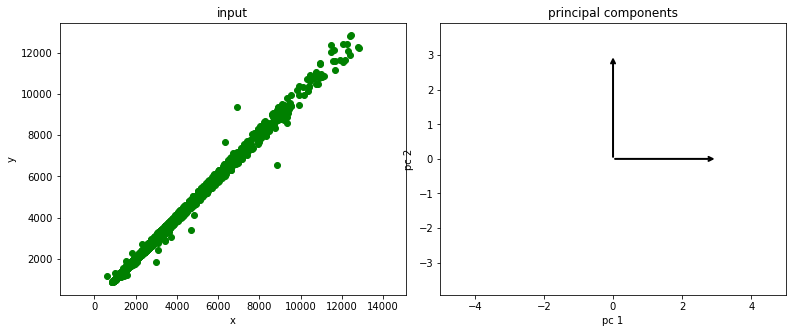

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fig.subplots_adjust(left=0.06, right=0.9, wspace=0.1)

ax[0].scatter(X.iloc[:, 0], X.iloc[:, 1],c='g');

for length, vector in zip(pca.explained_variance_,pca.components_   ):
    v = vector * 3 * np.sqrt(length)
    #ax[0].annotate('', pca.mean_+v , pca.mean_ , arrowprops = dict(arrowstyle='->',linewidth=2))
    
    
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')


# plot principal components
ax[1].scatter(X_pca[:, 0], X_pca[:, 1],c='r')

ax[1].annotate('', [0, 3], [0, 0], arrowprops = dict(arrowstyle='->', linewidth=2))
ax[1].annotate('', [3, 0], [0, 0], arrowprops = dict(arrowstyle='->', linewidth=2))

ax[1].axis('equal')
ax[1].set(xlabel='pc 1', ylabel='pc 2', title='principal components', xlim=(-5, 5), ylim=(-3, 3));


In [42]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=6, kernel='linear')
t = kpca.fit_transform(X)
t

array([[-6.39459585e+07, -6.76338174e+02, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.39602155e+07, -6.72731291e+02, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.38902285e+07, -6.81350680e+02, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.78446028e+08, -2.35164341e+03, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.85121483e+08, -2.37262794e+03, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 4.14738148e+08, -2.40978910e+03, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00]])

# Clustering

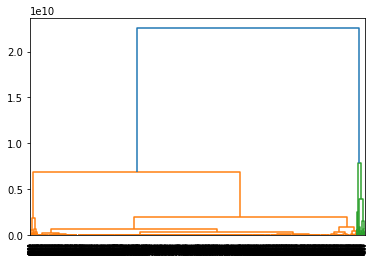

In [11]:
#drawing dendrogram to find the best K for clustering
from scipy.cluster.hierarchy import dendrogram , linkage 
dendrogram( linkage(dff,'ward'));

In [ ]:
###################### KMeans############################
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,random_state=0)# n_clusters=4,5,6 are the best k
#y = model.fit(dff)
#y.labels_# our clusters
#y.cluster_centers_# our cluster centers
#y.cluster_centers_[0]# our first cluster center
#y.predict([[0, 0]]) # checking the model with new prices
cluster.labels_ = model.fit_predict(dff)
cluster.labels_
####################################################################


In [ ]:
#########################hierarchical clustering################
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')# Ward can only work with euclidean distances.
#cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')  
#cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')  
#cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
#cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='single')  
#cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')  
#cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')  
cluster.fit_predict(dff);
cluster.labels_
#plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow') ; 

In [ ]:
#this algorithm doesn't work with our data, the problem is with the eps and maybe the column Volume in our data
'''
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=100,min_samples=1000)
dbscan.fit(dff)
cluster.labels_ = dbscan.labels_
'''

In [ ]:

fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(dff.iloc[:,1], cluster.labels_, s=50, c=cluster.labels_, cmap='viridis')

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_title('Learned Cluster Labels');

In [ ]:
arr = []#looking for specific clusters,Resistance and Support lines
for i in range(len(cluster.labels_)):
    if cluster.labels_[i] == 2:#0,1,2,3,4,5,6,7,8
        arr.append(dff.iloc[i,1])
len(arr)

In [ ]:
#for adding new rows from list to the current DataFrame
MeanDataFrame = pd.Series.to_frame(MeanRowSerie , name="MeanPrice")
for i in range(len(arr)):
    MeanDataFrame[i+1] = ([arr[i]]*len(dff))
########################ploting#######################
plt.figure(figsize=(25, 20))
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("IranKhodro Stock", fontdict = font1)
plt.xlabel("Date", fontdict = font2)
plt.ylabel("Price", fontdict = font2)
mplt.plot(MeanDataFrame)
#mplt.grid(axis = 'both',color = 'green', linestyle = '--', linewidth = 0.5)
#plt.subplot(1, 2, 1)
#plt.suptitle("MY SHOP")
plt.show()

# Neural Network

In [69]:
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting     import  plot_decision_regions
X_train= dff.iloc[:2500, 0:-1]
y_train = dff.iloc[:2500,-1]
model = MLPClassifier(hidden_layer_sizes=(2) , max_iter=110 , alpha=1e-4, solver='sgd', random_state=1 
                     ,verbose=True , learning_rate_init=.1 )
model.fit(X_train, y_train);


Iteration 1, loss = 678753.68885242
Iteration 2, loss = 1880754.56065160
Iteration 3, loss = 2320863.13320903
Iteration 4, loss = 2441434.99703599
Iteration 5, loss = 2472620.74155030
Iteration 6, loss = 2480558.24228414
Iteration 7, loss = 2482552.27277797
Iteration 8, loss = 2483033.35191495
Iteration 9, loss = 2483129.71768505
Iteration 10, loss = 2483128.28542753
Iteration 11, loss = 2483101.99423122
Iteration 12, loss = 2483069.38457993
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [70]:
model.score(X_train, y_train)

0.8976

In [65]:
X_test= dff.iloc[2500:, 0:-1]
y_test = dff.iloc[2500:,-1]
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
model.score(X_test, y_test)

0.8956772334293948

In [68]:
#plot_decision_regions(X_test.iloc[:,1], y_test.iloc[:,-1], clf=y_pred);

IndexingError: Too many indexers

# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train);
tree.predict(X_test)
tree.predict_proba(X_test)

array([[0.02431987, 0.96084089, 0.01483924],
       [0.02431987, 0.96084089, 0.01483924],
       [0.02431987, 0.96084089, 0.01483924],
       ...,
       [0.02431987, 0.96084089, 0.01483924],
       [0.00505051, 0.82323232, 0.17171717],
       [0.02431987, 0.96084089, 0.01483924]])

In [120]:
#Final solution for classifying

from  sklearn.linear_model      import  LogisticRegression
from  sklearn.neural_network    import  MLPClassifier
from  sklearn                   import  svm
from  sklearn.svm               import  SVC
from  sklearn.naive_bayes       import GaussianNB, BernoulliNB
from  sklearn.tree              import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from  sklearn.metrics   import  classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler

##############classifiers#############################
LRclf  = LogisticRegression(solver='lbfgs' , random_state=0 , C=0.3, penalty='l2')
MLPclf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(1) , alpha=1e-5, random_state=1) 
SVCrclf = SVC(C=1, kernel = 'rbf', random_state = 0, gamma='scale')    
SVClclf = SVC(kernel='linear', C=1)  
SVCpclf = SVC(kernel='poly', degree=2, C=0.5, gamma='scale') 
Bclf = BernoulliNB()
DTclf  = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
############Train Test split#############################
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=0)
############Standardize the Data#########################  
scaler = StandardScaler()  #MinMaxScaler()
scaler.fit(Xtrain)  
Xtrain = scaler.transform(Xtrain)  
Xtest  = scaler.transform(Xtest) 
##########Fitting Data and predicting the test Data#####

LRclf.fit(Xtrain , ytrain)
yLRclf= LRclf.predict(Xtest)#yLRclf

MLPclf.fit(Xtrain , ytrain)
yMLPclf= MLPclf.predict(Xtest) #yMLPclf

SVCrclf.fit(Xtrain , ytrain)
ySVCrclf= SVCrclf.predict(Xtest)#ySVCrclf

SVClclf .fit(Xtrain , ytrain)
ySVClclf= SVClclf .predict(Xtest)#ySVClclf

SVCpclf.fit(Xtrain , ytrain)
ySVCpclf= SVCpclf.predict(Xtest)#ySVCpclf

Bclf.fit(Xtrain , ytrain)
yBclf=Bclf.predict(Xtest)#yBclf

DTclf.fit(Xtrain , ytrain)
yDTclf= DTclf.predict(Xtest) #yDTclf
########Classification Report##########################
print('###LogisticRegression classification report###')
print(classification_report(ytest, yLRclf , target_names=['CLASS(1)', 'CLASS(0)','CLASS(-1)'] ))
print('###MLPClassifier classification report###')
print(classification_report(ytest, yMLPclf, target_names=['CLASS(1)', 'CLASS(0)','CLASS(-1)']))
print('###SVC rbf classification report###')
print(classification_report(ytest, ySVCrclf , target_names=['CLASS(1)', 'CLASS(0)','CLASS(-1)'] ))
print('###SVC linear classification report###')
print(classification_report(ytest, ySVClclf , target_names=['CLASS(1)', 'CLASS(0)','CLASS(-1)']))
print('###SVC poly classification report###')
print(classification_report(ytest, ySVCpclf , target_names=['CLASS(1)', 'CLASS(0)','CLASS(-1)']))
print('###BernoulliNB classification report###')
print(classification_report(ytest, yBclf , target_names=['CLASS(1)', 'CLASS(0)','CLASS(-1)']))
print('###DecisionTree classification report###')
print(classification_report(ytest, yDTclf , target_names=['CLASS(1)', 'CLASS(0)','CLASS(-1)']))

###LogisticRegression classification report###
              precision    recall  f1-score   support

    CLASS(1)       0.68      0.36      0.47        83
    CLASS(0)       0.93      0.98      0.95      1523
   CLASS(-1)       0.57      0.33      0.42        88

    accuracy                           0.91      1694
   macro avg       0.73      0.56      0.61      1694
weighted avg       0.90      0.91      0.90      1694

###MLPClassifier classification report###
              precision    recall  f1-score   support

    CLASS(1)       0.00      0.00      0.00        83
    CLASS(0)       0.92      0.98      0.95      1523
   CLASS(-1)       0.53      0.38      0.44        88

    accuracy                           0.90      1694
   macro avg       0.48      0.45      0.46      1694
weighted avg       0.85      0.90      0.87      1694

###SVC rbf classification report###
              precision    recall  f1-score   support

    CLASS(1)       0.60      0.14      0.23        83
    

C:\Users\BB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [117]:
#np.reshape(ypredict,(-1,1)).shape
#ytest
len(yLRclf)

1

In [44]:
confusion_matrix(ytest, ypcls) #confusion Matrix

array([[  34,   49,    0],
       [  32, 1469,   22],
       [   0,   78,   10]], dtype=int64)

In [45]:
cls.score (Xtrain , ytrain) # the score of Train Data

0.8839039748130657

In [46]:
cls.score (Xtest , ytest) # the score of Test Data

0.8931523022432113

In [121]:
pipeline = Pipeline([('scaler', scaler),('classifier', LRclf)])
scores_mean = cross_val_score(pipeline, Xtest, ytest,scoring='accuracy')*100
print("Mean Accuracy performance:{0:.3f}".format(scores_mean.mean()))

Mean Accuracy performance:90.910


In [ ]:
#New idea to add columns to an array
#experience = np.random.normal(size=100)
#salary = 1500 + experience + np.random.normal(size=100, scale=.5)
#X = np.column_stack([experience, salary])